# 计算机模拟第七周作业

In [1]:
from __future__ import print_function, division

# 这句话是非标准的python，用于ipthon或jupyter这样的系统中，表示绘图即刻自动展开。
%matplotlib inline

# 这里把全部Warning过滤掉了. 
# 参见https://docs.python.org/2/library/warnings.html
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(250)

## MC 积分

用 MC 积分计算
$$
I = \int _ { 0 } ^ { 1 } \int _ { 0 } ^ { 1 } \sin x \sin y d x d y,
$$
并给出 $\delta = 0.01$ 的置信区间估计。

下面假设函数 $\varphi(\vec{X})$ 定义在 $\mathscr { J } ^ { m }$ 上，积分值的 ${ \zeta } ( \mathscr { R } )$ 无偏估计为：
$$
\overline { \zeta } _ { n } ( \mathscr { R } ) = \frac { 1 } { n } \sum _ { i = 1 } ^ { n } \varphi \left( \vec { X } ^ { ( i ) } \right)
$$

置信区间这里使用：
$$
\left[ \overline { \zeta } _ { n } - \Phi ^ { - 1 } \left( 1 - \frac { \delta } { 2 } \right) \sqrt { \frac { \hat { \sigma } _ { n } ^ { 2 } } { n } } , \overline { \zeta } _ { n } + \Phi ^ { - 1 } \left( 1 - \frac { \delta } { 2 } \right) \sqrt { \frac { \hat { \sigma } _ { n } ^ { 2 } } { n } } \right]
$$
其中：
$$
\hat { \sigma } _ { n } ^ { 2 } = \frac { 1 } { n - 1 } \left[ \sum _ { j = 1 } ^ { n } \varphi ^ { 2 } \left( \vec { X } ^ { ( j ) } \right) - n \overline { \zeta } _ { n } ^ { 2 } \right]
$$

于是可以编写出下面的程序：

In [2]:
# 被积函数
def obj_fun2D(x, y):
    return np.sin(x) * np.sin(y)

# 二维 Monte Carlo 积分程序
# 输入：
# ----x1, x2, y1, y2：积分区间
# ----times: 投点次数
# ----delta：置信度
# 返回：
# ----[积分估计值，置信区间下界，置信区间上界]
def MC_Int2D(x1, x2, y1, y2, times, delta):
    X = np.random.rand(times) * (x2-x1) + x1
    Y = np.random.rand(times) * (y2-y1) + y1
    I = 0
    sigma2 = 0
    for i in range(times):
        funv = obj_fun2D(X[i], Y[i])
        I += funv
        sigma2 += funv**2
    I = I / times
    sigma2 = (sigma2-times*(I**2))/(times-1)
    length = norm.ppf(1-delta/2)*((sigma2/times)**(1/2))
    return I, I-length, I+length

投点 $10^6$ 次，得到的估计值、置信区间下界、上界分别为

In [3]:
# 投点 1000000 次
MC_Int2D(0, 1, 0, 1, 1000000, 0.01)

(0.21105583441543424, 0.21061205720659193, 0.21149961162427655)

与理论值 $(1-cos(1))^2$ 比较，可以看到十分接近。

In [17]:
(1-np.cos(1))**2

0.21132196999014932

# 被积函数性质与置信区间的关系

下面用一维积分来说明被积函数性质与置信区间的关系，首先定义一维的 Monte Carlo 积分程序：

In [123]:
# 一维 Monte Carlo 积分程序
# 输入：
# ----obj_fun：被积函数
# ----a, b：积分区间
# ----times: 投点次数
# ----delta：置信度
# 返回：
# ----[积分估计值，置信区间半径]
def MC_Int(obj_fun, a, b, times, delta):
    S = 0
    sigma2 = 0
    X = np.random.rand(times)*(b - a) + a
    for i in range(times):
        funv = obj_fun(X[i])
        S += funv
        sigma2 += funv**2
    S = S/times
    sigma2 = (sigma2-times*(S**2))/(times-1)
    length = norm.ppf(1-delta/2)*((sigma2/times)**(1/2))*(b-a)
    return S*(b-a), length*(b-a)

根据置信区间的定义：
$$
\left[ \overline { \zeta } _ { n } - \Phi ^ { - 1 } \left( 1 - \frac { \delta } { 2 } \right) \sqrt { \frac { \hat { \sigma } _ { n } ^ { 2 } } { n } } , \overline { \zeta } _ { n } + \Phi ^ { - 1 } \left( 1 - \frac { \delta } { 2 } \right) \sqrt { \frac { \hat { \sigma } _ { n } ^ { 2 } } { n } } \right]
$$
我们可以看到，相同积分值的情况下，绝对值偏大的函数会得到更大的置信区间，换言之，震荡程度越大的函数的置信区间越大。下面我们用 $cos(x), 5cos(5x), 9cos(9x)$ 在 $[0, \pi/2]$ 上的积分来验证我们的结论。容易计算得到这三个积分的结果都为 1。首先定义函数：

In [109]:
def obj_fun1(x):
    return np.cos(x)
def obj_fun2(x):
    return 5*np.cos(5*x)
def obj_fun3(x):
    return 9*np.cos(9*x)

函数的图像如下，明显看到波动程度：$9cos(9x) > 5cos(5x) > cos(x)$

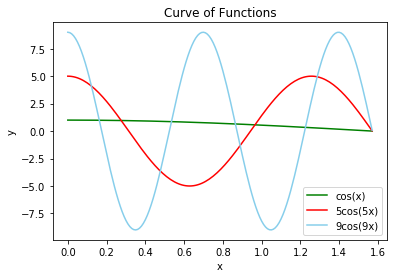

In [110]:
x = np.arange(0, np.pi/2, 0.01)
y1 = obj_fun1(x)
y2 = obj_fun2(x)
y3 = obj_fun3(x)

plt.title('Curve of Functions')
plt.plot(x, y1, color='green', label='cos(x)')
plt.plot(x, y2, color='red', label='5cos(5x)')
plt.plot(x, y3,  color='skyblue', label='9cos(9x)')
plt.legend()
 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

接下来验证函数变化幅度对置信区间长度的影响，从左至右依次是三个函数 100 次模拟得到的置信区间长度，可以看到与预期结果一致。

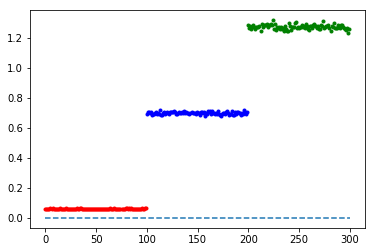

In [125]:
for T in range(100):
    (I, length) = MC_Int(obj_fun1, 0, np.pi/2, 1000, 0.01)
    plt.plot(T, length, 'r.')
    (I, length) = MC_Int(obj_fun2, 0, np.pi/2, 1000, 0.01)
    plt.plot(T+100, length, 'b.')
    (I, length) = MC_Int(obj_fun3, 0, np.pi/2, 1000, 0.01)
    plt.plot(T+200, length, 'g.')
plt.plot([0,300],[0,0],'--')

下面的代码用来检验所求置信区间的合理性，返回1000 次模拟中精确积分值 1 落入置信区间的次数：

In [127]:
confi_1 = 0
confi_2 = 0
confi_3 = 0
for T in range(1000):
    (I, length) = MC_Int(obj_fun1, 0, np.pi/2, 1000, 0.01)
    if 1 >= I-length and 1 <= I+length:
        confi_1 += 1
    (I, length) = MC_Int(obj_fun2, 0, np.pi/2, 1000, 0.01)
    if 1 >= I-length and 1 <= I+length:
        confi_2 += 1
    (I, length) = MC_Int(obj_fun3, 0, np.pi/2, 1000, 0.01)
    if 1 >= I-length and 1 <= I+length:
        confi_3 += 1
(confi_1, confi_2, confi_3)

(10000, 9999, 9999)